> ## Setup

In [28]:
# imports
import pandas as pd
import seaborn as sns
import folium
from ipyleaflet import GeoJSON, Map, Marker
import geopandas as gpd
import geojson
import statsmodels
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cm as cm
from matplotlib import colors
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import numpy as np
from pmdarima import auto_arima 

### Question1: most important features for predicting rental prices

In our classification model, the four most important features for predicting rental prices are as follows:


1. Bedrooms: The number of bedrooms is a significant determinant of rental prices, as it directly correlates with the capacity and comfort of the living space. 
Properties with more bedrooms typically cater to larger households, making them more desirable and, consequently, commanding higher rental rates.


2. Postcode: The postcode serves as an indicator of the property's location, which significantly influences rental values. 
Areas with desirable postcodes often offer better access to amenities, transportation, and schools, 
contributing to higher demand and increased rental prices.


3. Bathrooms: The quantity of bathrooms is another crucial factor impacting rental pricing.
A higher number of bathrooms enhances convenience for tenants, 
especially in larger households, and is often seen as a desirable feature that can justify a premium in rental costs.


4. Parking Spaces: The availability of parking spaces is a vital consideration in many regions, 
particularly in urban settings where parking can be scarce. 
Properties that offer designated parking tend to attract tenants who prioritize this convenience, 
thereby increasing the potential rental value.

By pearson correlation, the most significant features for predicting rental prices are bedrooms numbers and bathroom numbers.\
There is no significant correlation between distance to the closest train station and rental prices

<img src="../plots/pearson_corr.png" alt="pearson" />

With Spearman's correlation, bedroom number is still the most significant.\
The correlation is almost zero between distance to the closest train station and rental price.

<img src="../plots/spearmans_corr.png" alt="spearsmans" />

By using Anova, there are sufficent evidences to the effect of suburb and property type on rental price.
Suburb have a 0.000172 p-vlaue, and property type have the p-value equal to 1.878596e-41.

### Question2: top 10 suburbs with the highest predicted growth rate

**Top 10 suburbs with highest predicted growth rate for all properties**
1. Caulfield:&nbsp;0.605755
2. CBD-St Kilda Rd:&nbsp;0.456993
3. Richmond-Burnley:&nbsp;0.259125
4. Carlton-Parkville:&nbsp;0.221304
5. Thomastown-Lalor:&nbsp;0.216575
6. Malvern East:&nbsp;0.215734
7. Hawthorn:&nbsp;0.211035
8. Clayton:&nbsp;0.208304
9. East St Kilda:&nbsp;0.205950
10. Springvale:&nbsp;0.203281

> ## Question 2

In [16]:
historical_df = pd.read_csv('../data/curated/historical without postcode/cleaned All properties.csv')
predict_df = pd.read_csv('../data/analysis/future prices by suburb/predict all properties.csv')

In [17]:
historical_df

,suburb,Mar 2000,Jun 2000,Sep 2000,Dec 2000,Mar 2001,Jun 2001,Sep 2001,Dec 2001,Mar 2002,...,Dec 2021,Mar 2022,Jun 2022,Sep 2022,Dec 2022,Mar 2023,Jun 2023,Sep 2023,Dec 2023,Mar 2024
0,Albert Park-Middle Park-West St Kilda,260,260,270,275,275,280,280,290,300,...,495,500,515,500,525,545,550,600,600,650
1,Armadale,200,200,205,210,215,220,225,230,233,...,420,430,450,450,460,490,500,525,560,560
2,Carlton North,260,260,265,270,270,275,280,280,290,...,580,580,595,600,600,620,630,650,670,680
3,Carlton-Parkville,251,260,260,260,260,260,260,270,270,...,370,380,400,425,450,500,530,550,550,570
4,CBD-St Kilda Rd,320,320,320,320,320,320,320,320,320,...,355,375,400,450,480,550,580,600,620,640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,Dandenong North-Endeavour Hills,160,160,160,160,165,165,170,170,170,...,370,375,380,390,392,400,410,420,450,460
101,Narre Warren-Hampton Park,165,165,170,170,170,175,175,175,180,...,400,405,410,420,430,440,450,460,480,500
102,Noble Park,140,140,140,145,145,145,145,145,150,...,360,365,375,380,380,390,400,415,440,460
103,Pakenham,155,155,160,160,160,165,165,165,165,...,375,380,390,400,410,420,435,450,470,480


In [18]:
predict_df

,index,Albert Park-Middle Park-West St Kilda,Armadale,Carlton North,Carlton-Parkville,CBD-St Kilda Rd,Collingwood-Abbotsford,Docklands,East Melbourne,East St Kilda,...,Wantirna-Scoresby,Yarra Ranges,Berwick,Cranbourne,Dandenong,Dandenong North-Endeavour Hills,Narre Warren-Hampton Park,Noble Park,Pakenham,Springvale
0,31/03/2024,660.101998,569.331036,686.474888,568.770268,644.566684,616.218307,657.991981,600.355671,530.451313,...,572.988651,507.529896,541.618339,537.558411,456.577253,471.586820,513.989269,477.049297,491.659487,529.807737
1,30/06/2024,674.027694,582.038403,690.847142,560.385595,641.575688,623.048837,658.443877,596.029264,541.025668,...,583.607491,511.796743,552.711783,553.246201,475.252120,483.871353,528.878005,492.851026,505.755923,550.207860
2,30/09/2024,686.758036,573.825531,695.633531,546.686011,628.919113,627.054042,652.326995,597.749104,549.211942,...,593.044402,515.369723,563.318274,570.884924,495.326344,496.325878,544.256101,507.527719,517.767923,570.248014
3,31/12/2024,688.021709,570.211394,699.863906,529.964705,610.275369,631.059248,641.013166,593.927369,555.840090,...,601.513183,520.354556,573.473014,587.179413,516.122532,508.468638,559.746951,521.189873,529.027430,589.147813
4,31/03/2025,693.406267,576.396210,704.300083,512.633002,587.169498,635.064454,626.125680,595.267177,561.451622,...,609.188960,524.076739,583.208658,604.400108,537.005171,519.884087,575.014420,533.937134,539.606646,606.313244
5,30/06/2025,700.504545,565.849607,708.752763,496.908160,562.446217,639.069660,609.387029,594.137607,566.399853,...,616.215181,528.069464,592.555503,620.982627,557.398162,530.237598,589.767834,545.859358,549.570845,621.338737
6,30/09/2025,703.010139,558.398945,712.957381,484.560159,538.254213,643.074865,592.475514,596.128612,570.915306,...,622.709344,532.121491,601.541653,638.004863,576.798609,539.284444,603.765092,557.037578,558.979036,633.998779
7,31/12/2025,707.283671,564.761015,717.597251,476.742282,516.718920,647.080071,576.900800,596.818110,575.148390,...,628.767693,535.867124,610.193182,654.724124,594.786763,546.873166,616.814003,567.544869,567.884569,644.231184
8,31/03/2026,712.805614,558.389761,721.659207,473.917099,499.382504,651.085277,563.905947,599.286017,579.197238,...,634.469064,539.732630,618.534279,671.652141,611.032157,552.943764,628.772036,577.447127,576.335674,652.114262
9,30/06/2026,716.321003,552.462102,726.388454,475.876386,487.315305,655.090482,554.400594,601.035554,583.125880,...,639.878030,543.524346,626.587385,688.436321,625.296098,557.521310,639.544664,586.803775,584.375952,657.840099


In [19]:
# Convert date in df to datetime format
historical_df.set_index('suburb', inplace=True)
predict_df.set_index('index', inplace=True)
historical_df.columns = pd.to_datetime(historical_df.columns, format='%b %Y')
predict_df.index = pd.to_datetime(predict_df.index, dayfirst=True)

We will visualise the rental price predictions of one of the suburbs:

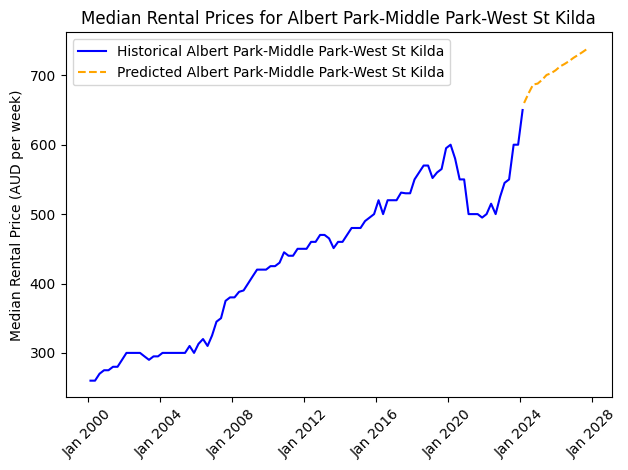

In [24]:
# Get the first suburb name
first_suburb = historical_df.index[0]

# Plot historical prices for the first suburb
plt.plot(historical_df.columns, historical_df.loc[first_suburb], label=f'Historical {first_suburb}', color='blue')

# Plot predicted prices for the same suburb
plt.plot(predict_df.index, predict_df[first_suburb], label=f'Predicted {first_suburb}', color='orange', linestyle='--')

# Format the x-axis
ax = plt.gca()  
ax.xaxis.set_major_locator(mdates.AutoDateLocator()) 
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.xticks(rotation=45)

plt.title(f'Median Rental Prices for {first_suburb}')
plt.ylabel('Median Rental Price (AUD per week)')

plt.legend()

plt.tight_layout()
plt.show()


Using the calculated growth rate, we can see the top 10 suburbs with highest predicted growth rate

In [33]:
folder_path = '../data/analysis/future prices by suburb/'
growth_filename = ['growth 1 bedroom flat.csv', 'growth 2 bedroom flat.csv', 'growth 3 bedroom flat.csv',
                    'growth 2 bedroom house.csv', 'growth 3 bedroom house.csv', 'growth 4 bedroom house.csv',
                    'growth all properties.csv']

property_types = ['one bed flat', 'two bed flat', 'three bed flat', 'two bed house', 'three bed house',
                 'four bed house', 'all properties']

for i in range(len(growth_filename)):
    file_path = folder_path + growth_filename[i]
    growth_df = pd.read_csv(file_path)
    top_10 = growth_df.nlargest(10, 'growth rate')
    property_type = property_types[i]
    print(f"Top 10 suburbs with highest predicted growth rate for {property_type}")
    print(top_10)

Top 10 suburbs with highest predicted growth rate for one bed flat
                       suburb  growth rate
51     Murrumbeena-Hughesdale     0.098103
101                Noble Park     0.085253
66   Coburg-Pascoe Vale South     0.074066
78       Fairfield-Alphington     0.070104
32              East Hawthorn     0.066253
65                  Brunswick     0.058599
86                  Thornbury     0.058413
69                   Essendon     0.057250
43                   Carnegie     0.056920
34                   Hawthorn     0.056907
Top 10 suburbs with highest predicted growth rate for two bed flat
                          suburb  growth rate
56             Newport-Spotswood     0.263672
30                       Clayton     0.209979
104                   Springvale     0.166336
102                   Noble Park     0.143157
103                     Pakenham     0.142022
98                    Cranbourne     0.119438
53                     Footscray     0.118291
82              Mill Park

We will evaluate the performance of ARIMA models by calculating the time-series cross-validation's RMSE for the all properties type.

In [34]:
# TimeSeriesSplit with 5 splits
tscv = TimeSeriesSplit(n_splits=5)
rmse_scores = []

for suburb in historical_df.index:  
    rental_prices = historical_df.loc[suburb].dropna() 

    # Perform TimeSeriesSplit cross-validation
    for train_index, test_index in tscv.split(rental_prices):
        y_train, y_test = rental_prices[train_index], rental_prices[test_index]

        # Fit ARIMA model on the training set
        model = auto_arima(y_train, seasonal=False, stepwise=True)

        # Forecast the same number of periods as the test set
        forecast = model.predict(n_periods=len(y_test))

        # Calculate RMSE for this fold
        rmse = np.sqrt(mean_squared_error(y_test, forecast))
        rmse_scores.append(rmse)

/tmp/ipykernel_37885/3672400969.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = rental_prices[train_index], rental_prices[test_index]
/tmp/ipykernel_37885/3672400969.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = rental_prices[train_index], rental_prices[test_index]
/tmp/ipykernel_37885/3672400969.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = rental_prices[train

In [37]:
# Print average RMSE across all splits
print(f'Average RMSE: ${np.mean(rmse_scores):.2f} per week')

Average RMSE: $24.93 per week


> ## Question 3

In [19]:
liveability_df = pd.read_csv("../data/curated/liveability_scores.csv").set_index("postcode")
liveability_melted_df = liveability_df.reset_index().melt(id_vars=['suburb', 'postcode'])

In [20]:
# liveability scores and individual metrics for suburbs with available social indicator data from highest score to lowest
liveability_df.sort_values(by=["score"], ascending=False)

,health,qol,learning,safety,median_all_properties,median_1_bedroom_Apartment / Unit / Flat,median_2_bedroom_Apartment / Unit / Flat,score,suburb
postcode,,,,,,,,,
3031,0.289655,0.583333,0.217949,1.000000,0.788608,0.934132,1.000000,4.813677,FLEMINGTON
3053,0.444828,0.212500,0.961538,0.071882,1.000000,1.000000,0.581818,4.272566,CARLTON
3002,1.000000,1.000000,0.000000,0.807611,0.271379,0.874251,0.163636,4.116878,EAST MELBOURNE
3000,0.000000,0.162500,0.666667,0.109937,0.737312,0.754491,1.000000,3.430906,MELBOURNE
3006,0.331034,0.412500,0.414530,0.687104,0.370058,0.730539,0.454545,3.400310,SOUTHBANK
3051,0.393103,0.000000,0.739316,0.000000,0.606411,0.982036,0.600000,3.320867,NORTH MELBOURNE
3141,0.624138,0.387500,0.076923,0.723044,0.138684,0.814371,0.472727,3.237388,SOUTH YARRA
3052,0.355172,0.320833,1.000000,0.232558,0.292711,0.574850,0.381818,3.157943,PARKVILLE
3003,0.393103,0.000000,0.739316,0.000000,0.427602,0.766467,0.818182,3.144670,WEST MELBOURNE


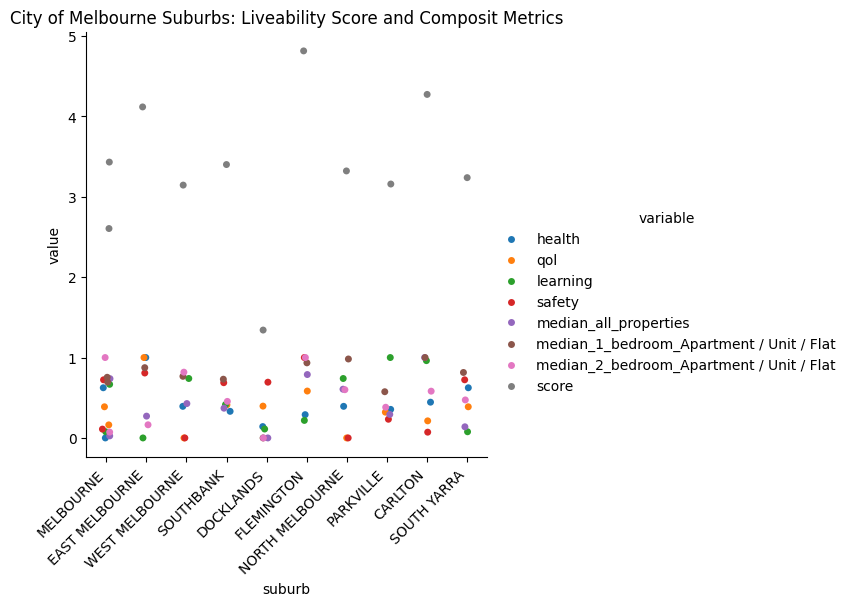

In [21]:
# plot liveability scores across surveyed suburbs
c_plot = sns.catplot(data = liveability_melted_df, x = "suburb", y = "value", hue = "variable")
c_plot.set_xticklabels(rotation = 45, ha='right')
c_plot.set(title="City of Melbourne Suburbs: Liveability Score and Composit Metrics")

> ## Geospatial Visualisations

In [31]:
median_postcode_df = pd.read_csv("../data/raw/median_price_per_postcode.csv")
historical_price_df = pd.read_csv("../data/raw/cleaned all properties.csv")

with open("../data/landing/geodata/suburbs.geojson", "r") as f:
    geojson_suburbs = geojson.load(f)

def median_rental_colour(feature):
    postcode = feature["properties"]["mccid_int"]
    df_median_price = median_postcode_df[median_postcode_df["postcode"] == int(postcode)]
    if df_median_price.empty:
        return {"color":"white", "fillColor":"black"}   
    median_price_max = max(median_postcode_df["median_all_properties"])
    median_price_min = min(median_postcode_df["median_all_properties"])
    price_col = (df_median_price["median_all_properties"] - median_price_min) / (median_price_max - median_price_min)
    hex_col = colors.to_hex(cm.YlOrRd(float(max(price_col)))) 
    return {"color":"white", "fillColor":hex_col}

def map():
    map_melb = Map(center=(-37.8082, 144.96332), zoom=12)
    geo_json = GeoJSON(  
        data=geojson_suburbs,  
        style={  
            "opacity": 1,  
            "dashArray": "9",  
            "fillOpacity": 0.5,  
            "weight": 1,  
        },
        hover_style={"color": "white", "dashArray": "0", "fillOpacity": 0.8},
        style_callback = median_rental_colour
    ) 
    map_melb.add_layer(geo_json)
    
    return map_melb

In [32]:
map()

Map(center=[-37.8082, 144.96332], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', …

> ## Rental Data Dashboard App

To run the dashboard app run the following command:

`shiny run --reload --launch-browser ../scripts/app.py`